In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00


In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import spacy
import requests
from bs4 import BeautifulSoup
import re
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from transformers import DistilBertTokenizer,AdamW
from torch.utils.data import DataLoader, Dataset
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.nn.functional import softmax
from datasets import load_dataset
import string
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import KeyedVectors
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import Concatenate, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
!python -m spacy download en_core_web_lg
eng_nlp = spacy.load('en_core_web_lg')

2023-12-06 21:09:55.032110: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 21:09:55.032180: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 21:09:55.032222: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 21:09:56.825380: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


Scrapping Business News from https://finviz.com/

In [ ]:
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'

In [ ]:
company = 'AAPL'
url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(company)
request = requests.get(url, headers={'User-Agent':user_agent})

In [ ]:
url

'https://finviz.com/quote.ashx?t=AAPL&p=d'

In [ ]:
request.ok

True

In [ ]:
parser = BeautifulSoup(request.text, 'html.parser')
news_html = parser.find_all('a',{'class':'tab-link-news'})
news_html[:2]

[<a class="tab-link-news" href="https://finance.yahoo.com/m/a2faa7a2-eb53-3144-976b-c7c27933ee2d/how-to-get-send-blue.html" rel="nofollow" target="_blank">How to get send blue iMessages on Android with Beeper Mini</a>,
 <a class="tab-link-news" href="https://appleinsider.com/articles/23/12/06/goodbye-green-bubbles-how-to-send-blue-imessages-from-android-with-beeper-mini?utm_medium=rss" rel="nofollow" target="_blank">Goodbye, green bubbles: How to send blue iMessages from Android with Beeper Mini</a>]

In [ ]:
regex = "target=\"_blank\"\>(.*)\<\/a\>"
regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]
regex_news[:15]

[['How to get send blue iMessages on Android with Beeper Mini'],
 ['Goodbye, green bubbles: How to send blue iMessages from Android with Beeper Mini'],
 ['Best Dow Jones Stocks To Buy And Watch In December 2023: Apple Hits New Buy Point'],
 ['Apple to launch new iPads, M3 MacBook Air to fight weak sales - Bloomberg News'],
 ['One Hot Group  And 4 Magnificent Seven Stocks  Top Breakout List'],
 ['Introducing the Financial Models Add-on for Above Avalon Membership'],
 ['iPad Air 12.9-inch and MacBook Air with M3 expected in March 2024'],
 ['Apple may have a busy March with a rumored larger iPad Air, OLED iPad Pros, and new Macs'],
 ['Apple Readies New iPads and M3 MacBook Air to Combat Sales Slump'],
 ['iPhone 15 Pro review 3 months later: price, performance'],
 ['Apple, Google Forced to Give Governments User Notifications Data'],
 ['UPDATE 1-Governments spying on Apple, Google users through push notifications -US senator'],
 ['Apple has new free AI &amp; Machine Learning tools'],
 ['Hol

In [ ]:
news_list = []

for x in regex_news:
    news_list.append(x[0])

news_dict = {}
news_dict['Company'] = company
news_dict['News'] = news_list

apple = pd.DataFrame(news_dict)

In [ ]:
apple

,Company,News
0,AAPL,How to get send blue iMessages on Android with...
1,AAPL,"Goodbye, green bubbles: How to send blue iMess..."
2,AAPL,Best Dow Jones Stocks To Buy And Watch In Dece...
3,AAPL,"Apple to launch new iPads, M3 MacBook Air to f..."
4,AAPL,One Hot Group And 4 Magnificent Seven Stocks ...
...,...,...
95,AAPL,A Bull Market Could Be Here: 3 Reasons to Buy ...
96,AAPL,Top 20 U.S. States By Median Household Income
97,AAPL,"Got $1,000? 4 Buffett Stocks to Buy and Hold F..."
98,AAPL,3 Reasons to Ride the Momentum with AAPL Stock


In [ ]:
def company_news(firm):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
    url = 'https://finviz.com/quote.ashx?t={}&p=d'.format(firm)
    request = requests.get(url, headers={'User-Agent':user_agent})
    parser = BeautifulSoup(request.text, 'html.parser')
    news_html = parser.find_all('a',{'class':'tab-link-news'})
    regex = "target=\"_blank\">(.*?)<\/a>"
    regex_news = [re.findall(regex, str(sentence)) for sentence in news_html]
    news_list = []

    for x in regex_news:
        news_list.append(x[0])

    news_dict = {}
    news_dict['Company'] = firm
    news_dict['News'] = news_list

    final_df = pd.DataFrame(news_dict)
    return final_df

In [ ]:
microsoft_df = company_news('MSFT')
microsoft_df

,Company,News
0,MSFT,Best Dow Jones Stocks To Buy And Watch In Dece...
1,MSFT,One Hot Group And 4 Magnificent Seven Stocks ...
2,MSFT,FTC to Go Before Panel of Judges Over Microsof...
3,MSFT,AI reigned on Wall Street in 2023 - These comp...
4,MSFT,Bill Gates Makes $10.95 Million Per Day More ...
...,...,...
95,MSFT,Google pushes for antitrust action against Mic...
96,MSFT,AI wars: Amazon is coming for Microsoft and Go...
97,MSFT,Microsoft Just One Of 23 Top Stocks To Watch O...
98,MSFT,Chart of the Day: Time to Hit Save and Update ...


In [ ]:
companies_df = pd.DataFrame()
tickers = ['AMZN', 'NFLX', 'INTC', 'TSLA', 'E'] # We are considering these top 5 companies

for c in tickers:
    new_df = company_news(c)
    companies_df = pd.concat([companies_df, new_df])

In [ ]:
companies_df

,Company,News
0,AMZN,6 Great Stocking Stuffers You'll Find on Amazon
1,AMZN,One Hot Group And 4 Magnificent Seven Stocks ...
2,AMZN,Amazon Targets Shein With Fee Cuts for Cheap A...
3,AMZN,AI: Whats next in 2024
4,AMZN,Hollywood actors approve strike-ending deal
...,...,...
95,E,Eni Raises Buybacks as Profit Soars on High En...
96,E,Are Investors Undervaluing Eni (E) Right Now?
97,E,Ukraine Latest: Gazprom Cuts Nord Stream Gas S...
98,E,Eni SpA (E) Flat As Market Gains: What You Sho...


In [ ]:
companies_df.Company.value_counts()

AMZN    100
NFLX    100
INTC    100
TSLA    100
E       100
Name: Company, dtype: int64

In [ ]:
companies_df = companies_df.reset_index().drop(columns='index')
companies_df

,Company,News
0,AMZN,6 Great Stocking Stuffers You'll Find on Amazon
1,AMZN,One Hot Group And 4 Magnificent Seven Stocks ...
2,AMZN,Amazon Targets Shein With Fee Cuts for Cheap A...
3,AMZN,AI: Whats next in 2024
4,AMZN,Hollywood actors approve strike-ending deal
...,...,...
495,E,Eni Raises Buybacks as Profit Soars on High En...
496,E,Are Investors Undervaluing Eni (E) Right Now?
497,E,Ukraine Latest: Gazprom Cuts Nord Stream Gas S...
498,E,Eni SpA (E) Flat As Market Gains: What You Sho...


In [ ]:
  companies_df.News[321]

'Why Tesla Stock Bounced Higher on Tuesday'

### Model

In [ ]:
training_data_path = '/content/all-data.csv'
training_df = pd.read_csv(training_data_path, encoding='ISO-8859-1', header=None)
training_df.columns = ['Sentiment', 'News']
training_df.head(),training_df.shape

(  Sentiment                                               News
 0   neutral  According to Gran , the company has no plans t...
 1   neutral  Technopolis plans to develop in stages an area...
 2  negative  The international electronic industry company ...
 3  positive  With the new production plant the company woul...
 4  positive  According to the company 's updated strategy f...,
 (4846, 2))

In [ ]:
#Preprocessing for model

In [ ]:
import re

# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
#     text = re.sub(r'http\S+', '', text)  # Remove URLs
#     text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
#     text = re.sub(r'\n', '', text)  # Remove line breaks
#     text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
#     return text

def preprocess_text(text):
    doc = eng_nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_digit]
    return ' '.join(tokens)

def get_vector(text):
    doc = eng_nlp(text)
    return doc.vector

training_df['processed_text'] = training_df['News'].apply(lambda x: preprocess_text(x))
training_df['vector'] = training_df['processed_text'].apply(get_vector)
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2,0:0,1:1,2:2}
training_df['Sentiment'] = training_df['Sentiment'].map(sentiment_mapping)
training_df.head(3)

,Sentiment,News,processed_text,vector
0,1,"According to Gran , the company has no plans t...",accord gran company plan production russia com...,"[-0.38800502, -1.1950002, -3.6439695, 0.866737..."
1,1,Technopolis plans to develop in stages an area...,"technopoli plan develop stage area 100,000 squ...","[0.24889794, 0.7152906, -1.9838582, 0.40137172..."
2,0,The international electronic industry company ...,international electronic industry company elco...,"[-0.693299, -0.8801901, -0.71899754, 1.705341,..."


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_df['processed_text'])

sequences = tokenizer.texts_to_sequences(training_df['processed_text'])

vocab_size = len(tokenizer.word_index) + 1

embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if word in eng_nlp.vocab:
        embedding_matrix[i] = eng_nlp.vocab[word].vector

In [ ]:
sequences = tokenizer.texts_to_sequences(training_df['processed_text'])
sequence_lengths = [len(seq) for seq in sequences]
max_length = int(np.percentile(sequence_lengths, 95))

X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')

y = to_categorical(training_df['Sentiment'].values, num_classes=3)


X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
#Model

input_layer = Input(shape=(max_length,))

embedding_layer = Embedding(input_dim=vocab_size, output_dim=300, weights=[embedding_matrix], trainable=False)(input_layer)

bilstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)


attention = tf.keras.layers.Attention()([bilstm_layer, bilstm_layer])
attention_flatten = Flatten()(attention)

concat_layer = Concatenate()([GlobalAveragePooling1D()(bilstm_layer), attention_flatten])

dense_layer_1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat_layer)
dropout_layer = Dropout(0.5)(dense_layer_1)
dense_layer_2 = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(dropout_layer)

output_layer = Dense(3, activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 25)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 25, 300)              2495700   ['input_3[0][0]']             
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 25, 256)              439296    ['embedding_2[0][0]']         
 onal)                                                                                            
                                                                                                  
 attention_2 (Attention)     (None, 25, 256)              0         ['bidirectional_2[0][0]'

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=16,
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10
218/218 [==============================] - 2s 10ms/step - loss: 0.6569 - accuracy: 0.8578 - val_loss: 0.9913 - val_accuracy: 0.7191
Epoch 2/10
218/218 [==============================] - 2s 8ms/step - loss: 0.5874 - accuracy: 0.8982 - val_loss: 0.9815 - val_accuracy: 0.7629
Epoch 3/10
218/218 [==============================] - 2s 8ms/step - loss: 0.5250 - accuracy: 0.9189 - val_loss: 0.9913 - val_accuracy: 0.7448
Epoch 4/10
218/218 [==============================] - 2s 9ms/step - loss: 0.4540 - accuracy: 0.9338 - val_loss: 0.9926 - val_accuracy: 0.7448
Epoch 5/10
218/218 [==============================] - 2s 10ms/step - loss: 0.4501 - accuracy: 0.9372 - val_loss: 1.0404 - val_accuracy: 0.7835
Epoch 5: early stopping


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

31/31 [==============================] - 0s 5ms/step - loss: 0.9557 - accuracy: 0.7433
Test Loss: 0.9557
Test Accuracy: 0.7433


In [ ]:
predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

print(confusion_matrix(true_labels, predicted_labels))
print(classification_report(true_labels, predicted_labels))

31/31 [==============================] - 1s 4ms/step
[[ 76  15  19]
 [ 25 463  83]
 [ 15  92 182]]
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       110
           1       0.81      0.81      0.81       571
           2       0.64      0.63      0.64       289

    accuracy                           0.74       970
   macro avg       0.70      0.71      0.71       970
weighted avg       0.74      0.74      0.74       970



## Trying Pretrained distilRoberta

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")

for param in model.parameters():
    param.requires_grad = False

for param in model.classifier.parameters():
    param.requires_grad = True

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

### Preprocessing our data for distilRoberta

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, df):
        self.labels = df['Sentiment'].apply(lambda x: {'negative': 0, 'neutral': 1, 'positive': 2}[x])
        self.texts = [tokenizer(text, padding='max_length', truncation=True, max_length=512, return_tensors="pt") for text in df['News']]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val.squeeze() for key, val in self.texts[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item


In [ ]:
#setting device environment
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
#Preparing model
tokenizer = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
dataset = NewsDataset(training_df)
#train_loader = DataLoader(dataset, batch_size=16, shuffle=True)
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
optimizer = AdamW(model.parameters(), lr=1e-5)

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
num_epochs = 10
early_stopping_patience = 2
best_val_loss = float('inf')
epochs_no_improve = 0



for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch in train_loader:
        optimizer.zero_grad()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)

        loss = outputs.loss
        total_loss += loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        correct = (predictions == batch['labels']).sum().item()
        total_correct += correct
        total_samples += batch['labels'].size(0)

        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = 0
    val_correct = 0
    val_samples = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            val_loss += loss.item()
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)
            val_correct += (predictions == batch['labels']).sum().item()
            val_samples += batch['labels'].size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = val_correct / val_samples
    print(f"Validation - Epoch {epoch + 1}/{num_epochs} completed. Average Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print("Early stopping triggered")
            break

Validation - Epoch 1/10 completed. Average Loss: 0.3730, Accuracy: 0.8649
Validation - Epoch 2/10 completed. Average Loss: 0.3701, Accuracy: 0.8660
Validation - Epoch 3/10 completed. Average Loss: 0.3672, Accuracy: 0.8680
Validation - Epoch 4/10 completed. Average Loss: 0.3620, Accuracy: 0.8691
Validation - Epoch 5/10 completed. Average Loss: 0.3597, Accuracy: 0.8649
Validation - Epoch 6/10 completed. Average Loss: 0.3567, Accuracy: 0.8691
Validation - Epoch 7/10 completed. Average Loss: 0.3536, Accuracy: 0.8701
Validation - Epoch 8/10 completed. Average Loss: 0.3549, Accuracy: 0.8649
Validation - Epoch 9/10 completed. Average Loss: 0.3530, Accuracy: 0.8680
Validation - Epoch 10/10 completed. Average Loss: 0.3495, Accuracy: 0.8660


In [ ]:
# model_path = '/content/my_distilbert_model'
# model.save_pretrained(model_path)
# tokenizer.save_pretrained(model_path)

# from google.colab import files

# !zip -r /content/my_distilbert_model.zip /content/my_distilbert_model

# files.download('/content/my_distilbert_model.zip')


In [ ]:
class SimpleNewsDataset(Dataset):
    def __init__(self, tokenized_texts):
        self.texts = tokenized_texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {key: val.squeeze() for key, val in self.texts[idx].items()}


news_texts = companies_df['News'].tolist()

tokenized_news = [tokenizer(news, padding='max_length', truncation=True, max_length=512, return_tensors="pt") for news in news_texts]

news_dataset = SimpleNewsDataset(tokenized_news)
news_loader = DataLoader(news_dataset, batch_size=16, shuffle=False)

model.eval()
predictions = []
probabilities = []
with torch.no_grad():
    for batch in news_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=1)
        predictions.extend(batch_predictions.cpu().numpy())

        batch_probabilities = softmax(logits, dim=1)
        probabilities.extend(batch_probabilities.cpu().numpy())

label_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
predicted_labels = [label_map[label] for label in predictions]

prob_dicts = [{'negative': prob[0], 'neutral': prob[1], 'positive': prob[2]} for prob in probabilities]

companies_df['Sentiment'] = predicted_labels
companies_df['Probabilities'] = prob_dicts

In [ ]:
companies_df

,Company,News,Sentiment,Probabilities
0,AMZN,The Market Has Rallied This Year. Should You P...,positive,"{'negative': 0.010116592, 'neutral': 0.2858939..."
1,AMZN,Better Stock Buy: Shopify vs. Amazon,neutral,"{'negative': 0.020237766, 'neutral': 0.8107261..."
2,AMZN,Looking to Boost Your Portfolio Before the New...,positive,"{'negative': 0.011704557, 'neutral': 0.1763675..."
3,AMZN,One Hot Group And 4 Magnificent Seven Stocks ...,neutral,"{'negative': 0.013571682, 'neutral': 0.8896645..."
4,AMZN,How Students With Amazon Prime Can Get a $25 R...,neutral,"{'negative': 0.008815793, 'neutral': 0.716976,..."
...,...,...,...,...
495,E,Eni Raises Buybacks as Profit Soars on High En...,positive,"{'negative': 0.019963592, 'neutral': 0.1526131..."
496,E,Are Investors Undervaluing Eni (E) Right Now?,negative,"{'negative': 0.62618166, 'neutral': 0.3549108,..."
497,E,Ukraine Latest: Gazprom Cuts Nord Stream Gas S...,neutral,"{'negative': 0.46896338, 'neutral': 0.48063856..."
498,E,Eni SpA (E) Flat As Market Gains: What You Sho...,neutral,"{'negative': 0.06704275, 'neutral': 0.8234409,..."


Creating a columns for each score.

In [ ]:
sentiment_dict = {}

for index, news in zip(companies_df.index, companies_df.Probabilities):
    sentiment_dict[index] = news

sentiment_dict

{0: {'negative': 0.010116592, 'neutral': 0.28589398, 'positive': 0.7039895},
 1: {'negative': 0.020237766, 'neutral': 0.81072617, 'positive': 0.16903608},
 2: {'negative': 0.011704557, 'neutral': 0.17636758, 'positive': 0.81192786},
 3: {'negative': 0.013571682, 'neutral': 0.8896645, 'positive': 0.09676383},
 4: {'negative': 0.008815793, 'neutral': 0.716976, 'positive': 0.27420825},
 5: {'negative': 0.13682182, 'neutral': 0.7260204, 'positive': 0.13715777},
 6: {'negative': 0.01923305, 'neutral': 0.90794814, 'positive': 0.07281886},
 7: {'negative': 0.019701647, 'neutral': 0.8953599, 'positive': 0.08493847},
 8: {'negative': 0.013377797, 'neutral': 0.7212038, 'positive': 0.26541835},
 9: {'negative': 0.023805968, 'neutral': 0.87011147, 'positive': 0.10608255},
 10: {'negative': 0.0065320423, 'neutral': 0.36783442, 'positive': 0.62563354},
 11: {'negative': 0.011492246, 'neutral': 0.32058495, 'positive': 0.6679228},
 12: {'negative': 0.01299046, 'neutral': 0.24022837, 'positive': 0.7467

In [ ]:
pd.DataFrame(sentiment_dict)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
negative,0.010117,0.020238,0.011705,0.013572,0.008816,0.136822,0.019233,0.019702,0.013378,0.023806,...,0.022275,0.013370,0.618577,0.009699,0.018721,0.019964,0.626182,0.468963,0.067043,0.055152
neutral,0.285894,0.810726,0.176368,0.889664,0.716976,0.726020,0.907948,0.895360,0.721204,0.870111,...,0.916675,0.155871,0.354765,0.245093,0.823424,0.152613,0.354911,0.480639,0.823441,0.855397
positive,0.703990,0.169036,0.811928,0.096764,0.274208,0.137158,0.072819,0.084938,0.265418,0.106083,...,0.061050,0.830759,0.026658,0.745209,0.157855,0.827423,0.018908,0.050398,0.109516,0.089451


Transposing it.

In [ ]:
sentiment_df = pd.DataFrame(sentiment_dict).T
sentiment_df

,negative,neutral,positive
0,0.010117,0.285894,0.703990
1,0.020238,0.810726,0.169036
2,0.011705,0.176368,0.811928
3,0.013572,0.889664,0.096764
4,0.008816,0.716976,0.274208
...,...,...,...
495,0.019964,0.152613,0.827423
496,0.626182,0.354911,0.018908
497,0.468963,0.480639,0.050398
498,0.067043,0.823441,0.109516


Merging the two dataframes.

In [ ]:
final_df = companies_df.merge(sentiment_df, left_index=True, right_index=True)
final_df

,Company,News,Sentiment,Probabilities,negative,neutral,positive
0,AMZN,The Market Has Rallied This Year. Should You P...,positive,"{'negative': 0.010116592, 'neutral': 0.2858939...",0.010117,0.285894,0.703990
1,AMZN,Better Stock Buy: Shopify vs. Amazon,neutral,"{'negative': 0.020237766, 'neutral': 0.8107261...",0.020238,0.810726,0.169036
2,AMZN,Looking to Boost Your Portfolio Before the New...,positive,"{'negative': 0.011704557, 'neutral': 0.1763675...",0.011705,0.176368,0.811928
3,AMZN,One Hot Group And 4 Magnificent Seven Stocks ...,neutral,"{'negative': 0.013571682, 'neutral': 0.8896645...",0.013572,0.889664,0.096764
4,AMZN,How Students With Amazon Prime Can Get a $25 R...,neutral,"{'negative': 0.008815793, 'neutral': 0.716976,...",0.008816,0.716976,0.274208
...,...,...,...,...,...,...,...
495,E,Eni Raises Buybacks as Profit Soars on High En...,positive,"{'negative': 0.019963592, 'neutral': 0.1526131...",0.019964,0.152613,0.827423
496,E,Are Investors Undervaluing Eni (E) Right Now?,negative,"{'negative': 0.62618166, 'neutral': 0.3549108,...",0.626182,0.354911,0.018908
497,E,Ukraine Latest: Gazprom Cuts Nord Stream Gas S...,neutral,"{'negative': 0.46896338, 'neutral': 0.48063856...",0.468963,0.480639,0.050398
498,E,Eni SpA (E) Flat As Market Gains: What You Sho...,neutral,"{'negative': 0.06704275, 'neutral': 0.8234409,...",0.067043,0.823441,0.109516


### Results

In [ ]:
final_df.groupby('Company')[['negative', 'neutral', 'positive']].mean()

,negative,neutral,positive
Company,,,
AMZN,0.075164,0.630374,0.294462
E,0.139666,0.554914,0.305420
INTC,0.185076,0.558054,0.256871
NFLX,0.138556,0.635780,0.225664
TSLA,0.290780,0.488182,0.221038


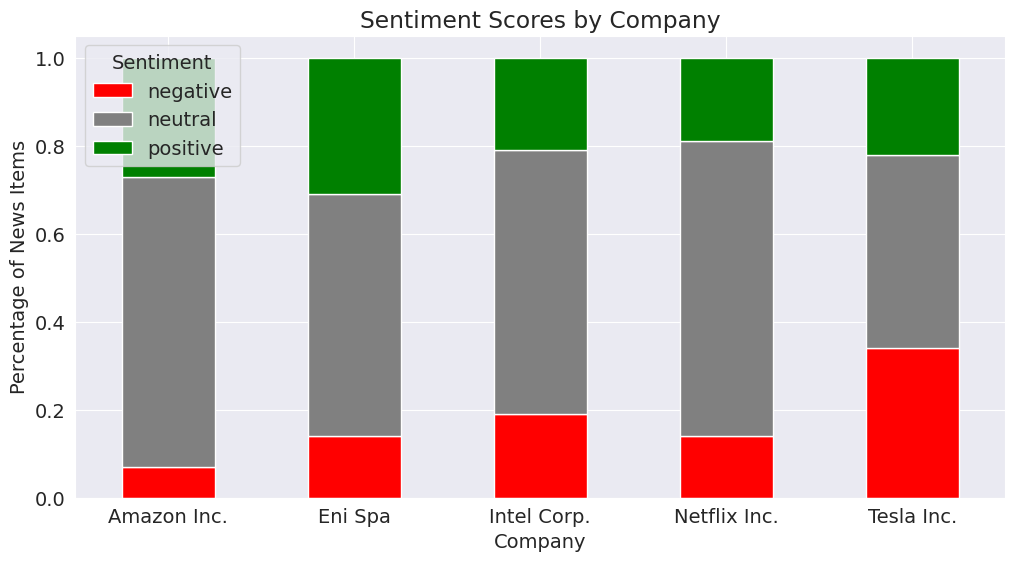

In [ ]:
# Define your new labels
new_labels = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corp.',
    'AMZN': 'Amazon Inc.',
    'NFLX': 'Netflix Inc.',
    'INTC': 'Intel Corp.',
    'TSLA': 'Tesla Inc.',
    'E': 'Eni Spa'
}

companies_df['Company'] = companies_df['Company'].map(new_labels)

sentiment_counts = companies_df.groupby('Company')['Sentiment'].value_counts().unstack(fill_value=0)
sentiment_percentages = sentiment_counts.divide(sentiment_counts.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sentiment_percentages.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], ax=plt.gca())
plt.title('Sentiment Scores by Company')
plt.xlabel('Company')
plt.ylabel('Percentage of News Items')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)
plt.show()
